# Look at the Singal Filtering to check that it is a reasonable filter

In [1]:
import cftime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib widget

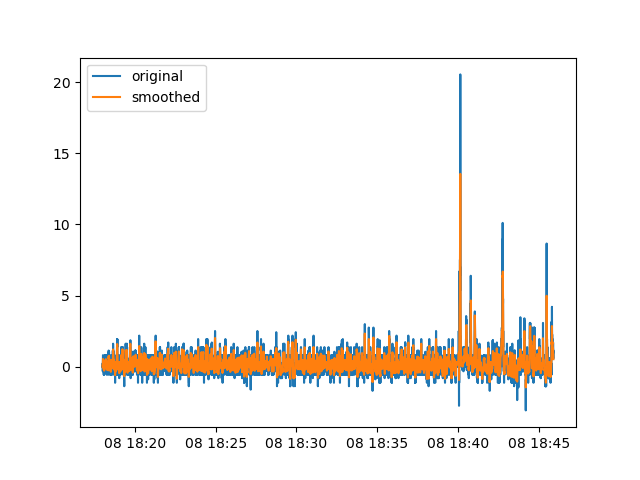

In [20]:
# Load an actual mission trajectory and check how well the averaging does
mission_nc = '../../data/mission_19.nc'
mission_dataset = nc.Dataset(mission_nc, mode='r')

# Extract the x and y locations of each buoy in the FRF coordinate system
x_locations = np.ma.masked_invalid(mission_dataset['xFRF'])
x_vals = x_locations[5, :]

# Get the time values of the mission
time = cftime.num2pydate(mission_dataset['time'],
                            units=mission_dataset['time'].units,
                            calendar=mission_dataset['time'].calendar)

# Compute the gradient and apply the moving average smoothing
cross_shore_vel = np.gradient((x_vals[0] - x_vals), 1/12)
cross_shore_vel = np.ma.filled(cross_shore_vel, np.NaN)
cross_shore_vel_nonans = cross_shore_vel.copy()
cross_shore_vel_nonans[np.isnan(cross_shore_vel)] = 0
sos = signal.butter(1, 0.5, 'lowpass', fs=12, output='sos')
cross_shore_vel_filtered = signal.sosfiltfilt(sos, cross_shore_vel_nonans)
cross_shore_vel_filtered[np.isnan(cross_shore_vel)] = np.NaN

# Plot the original and smoothed time series of velocity
fig, ax = plt.subplots()
ax.plot(time, cross_shore_vel, label='original')
ax.plot(time, cross_shore_vel_filtered, label='smoothed')
ax.legend()